Problem Statement: Study employee productivity in WFH vs WFO.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('WFH_WFO_dataset.csv', index_col= 'ID')

In [22]:
data.shape

(207, 18)

In [23]:
data.head()

,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
ID,,,,,,,,,,,,,,,,,,
1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
4,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
5,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 1 to 207
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         207 non-null    object
 1   Age                          207 non-null    int64 
 2   Occupation                   207 non-null    object
 3   Gender                       207 non-null    object
 4   Same_ofiice_home_location    207 non-null    object
 5   kids                         207 non-null    object
 6   RM_save_money                207 non-null    object
 7   RM_quality_time              207 non-null    object
 8   RM_better_sleep              207 non-null    object
 9   calmer_stressed              207 non-null    object
 10  RM_professional_growth       207 non-null    int64 
 11  RM_lazy                      207 non-null    int64 
 12  RM_productive                207 non-null    int64 
 13  digital_connect_sufficient   207 no

In [25]:
data.describe()

,Age,RM_professional_growth,RM_lazy,RM_productive,RM_better_work_life_balance,RM_improved_skillset,Target
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,29.666667,3.086957,3.101449,3.623188,3.043478,3.521739,0.405797
std,8.506993,1.089301,1.255801,0.996617,1.247539,1.004002,0.492236
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,25.000000,2.000000,2.000000,3.000000,2.000000,3.000000,0.000000
50%,26.000000,3.000000,3.000000,4.000000,3.000000,3.000000,0.000000
75%,29.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [26]:
data.drop_duplicates(ignore_index=True)

,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
1,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
2,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
3,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
4,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Louis,28,Manager,Male,Yes,No,No,No,No,STRESSED,2,4,3,No,2,5,Not sure,0
179,Nandini,32,Engineer,Female,Yes,Yes,Yes,Yes,Yes,CALMER,4,1,5,Yes,3,3,Not sure,1
180,Matt,52,Business,Male,Yes,Yes,Yes,Yes,Yes,CALMER,4,4,4,Yes,5,3,No,1
181,Rithik,22,Marketing,Male,Yes,No,Yes,Yes,No,STRESSED,4,4,4,No,4,3,Not sure,0


In [27]:
data['RM_productive'].value_counts()

4    69
3    66
5    45
2    24
1     3
Name: RM_productive, dtype: int64

In [28]:
data['Occupation'].unique()

array(['Tutor', 'HR', 'Engineer', 'Recruiter', 'Business', 'Marketing ',
       'Manager'], dtype=object)

In [29]:
data['Occupation'].value_counts() 

Engineer      51
Tutor         30
Manager       29
HR            26
Business      26
Marketing     26
Recruiter     19
Name: Occupation, dtype: int64

In [30]:
data['Target'].value_counts()

0    123
1     84
Name: Target, dtype: int64

In [31]:
data['calmer_stressed'].value_counts()

STRESSED    126
CALMER       81
Name: calmer_stressed, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [14]:
features = ['Gender','Same_ofiice_home_location','kids','RM_save_money','RM_quality_time','RM_better_sleep']

In [15]:
encode = LabelEncoder()

In [2]:
import numpy as np

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data=pd.read_csv("C:/Users/supra/py files/WFH_vs_WFO/encoded_dataset.csv")

In [45]:
data.head()

,ID,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,1,Bhavana,45,Tutor,0,1,1,1,1,1,0,5,1,5,Yes,5,5,2,1
1,2,Harry,24,Tutor,1,0,0,0,0,0,0,2,2,2,No,3,3,0,1
2,3,Banditaa,53,HR,0,1,1,1,1,1,0,3,3,4,No,5,3,0,1
3,4,Neetha,26,Engineer,0,1,0,1,1,0,1,3,4,4,No,4,5,2,0
4,5,Ram,26,Recruiter,1,1,0,0,1,0,1,3,3,5,Yes,4,2,2,1


In [46]:
data.shape

(207, 19)

Text(0.5, 1.0, 'WFH vs WFO')

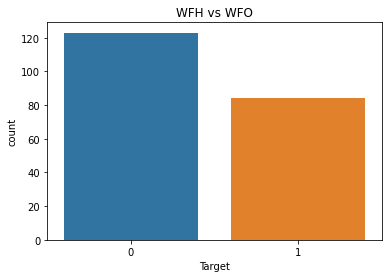

In [47]:
ax=sns.countplot(x='Target',data=data)
plt.title('WFH vs WFO')

Text(0.5, 1.0, 'WFH vs WFO')

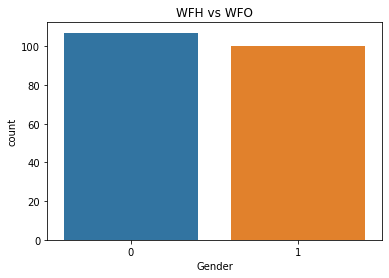

In [48]:
ax=sns.countplot(x='Gender',data=data)
plt.title('WFH vs WFO')


Text(0.5, 1.0, 'Occupation vs RM_productive')

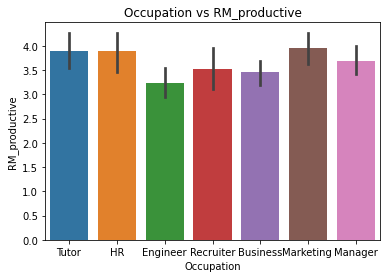

In [49]:
ax=sns.barplot(x='Occupation',y='RM_productive',data=data)
plt.title('Occupation vs RM_productive')


In [50]:
data.columns

Index(['ID', 'Name', 'Age', 'Occupation', 'Gender',
       'Same_ofiice_home_location', 'kids', 'RM_save_money', 'RM_quality_time',
       'RM_better_sleep', 'calmer_stressed', 'RM_professional_growth',
       'RM_lazy', 'RM_productive', 'digital_connect_sufficient',
       'RM_better_work_life_balance', 'RM_improved_skillset',
       'RM_job_opportunities', 'Target'],
      dtype='object')

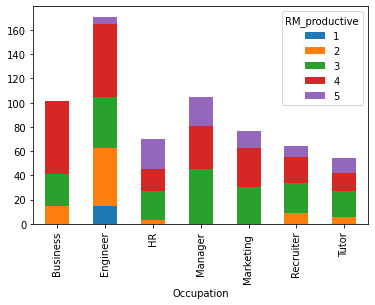

In [51]:
grouped_data = data.groupby(['Occupation','RM_productive'])['RM_lazy'].sum().unstack()

# Plot the stacked bar chart
grouped_data.plot(kind='bar', stacked=True)
#plt.ylim(-5,25)
plt.show()

In [52]:
data["Occupation"].value_counts()

Engineer      51
Tutor         30
Manager       29
HR            26
Business      26
Marketing     26
Recruiter     19
Name: Occupation, dtype: int64

Text(0.5, 1.0, 'RM_professional_growth')

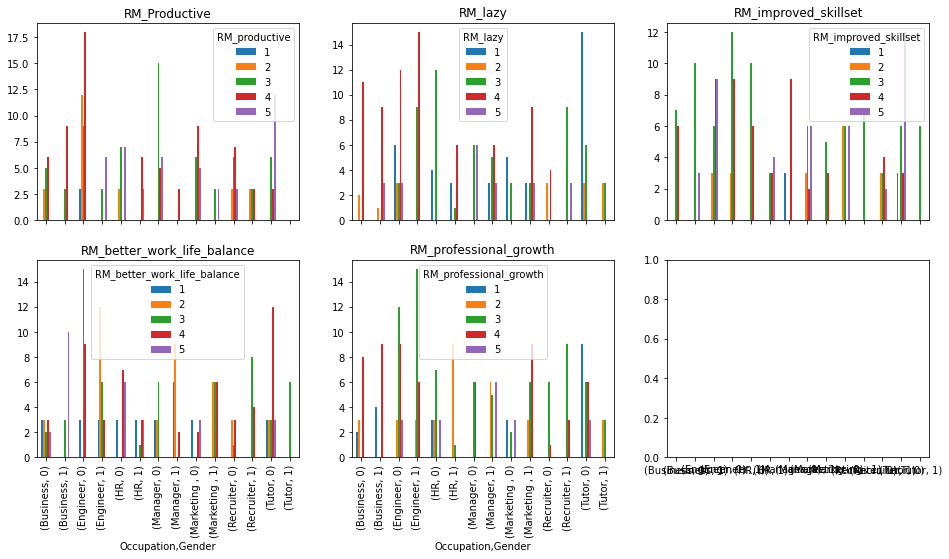

In [53]:
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(16,8))
data.groupby(['Occupation','kids'])['RM_productive'].value_counts().unstack().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('RM_Productive')

data.groupby(['Occupation','Gender'])['RM_lazy'].value_counts().unstack().plot(kind='bar',ax = axes[0,1])
axes[0,1].set_title('RM_lazy')

data.groupby(['Occupation','Gender'])['RM_improved_skillset'].value_counts().unstack().plot(kind='bar', ax=axes[0,2])
axes[0,2].set_title('RM_improved_skillset')

data.groupby(['Occupation','Gender'])['RM_better_work_life_balance'].value_counts().unstack().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('RM_better_work_life_balance')

data.groupby(['Occupation','Gender'])['RM_professional_growth'].value_counts().unstack().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('RM_professional_growth')

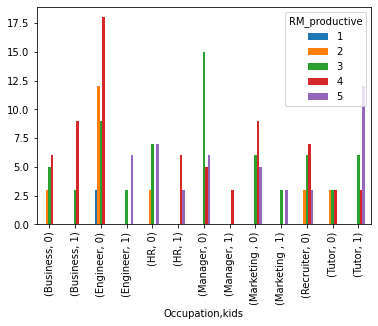

In [59]:
#In WFH,it is observed that employees who have kids  have less productivity

data.groupby(['Occupation','kids'])['RM_productive'].value_counts().unstack().plot(kind='bar')
#axes[0,0].set_title('RM_Productive')
plt.show()

In [ ]:
plt.plot([],[],color='pink',label='Books',linewidth=5)
plt.plot([],[],color='red',label='Electronics',linewidth=5)
plt.plot([],[],color='green',label='Food',linewidth=5)
plt.plot([],[],color='purple',label='Clothing',linewidth=5)
plt.stackplot(,colors=['pink','red','green','purple'])
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title("Area chart for sales of different categories")
plt.legend()
plt.show()

In [65]:
data.head()

,ID,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,1,Bhavana,45,Tutor,0,1,1,1,1,1,0,5,1,5,Yes,5,5,2,1
1,2,Harry,24,Tutor,1,0,0,0,0,0,0,2,2,2,No,3,3,0,1
2,3,Banditaa,53,HR,0,1,1,1,1,1,0,3,3,4,No,5,3,0,1
3,4,Neetha,26,Engineer,0,1,0,1,1,0,1,3,4,4,No,4,5,2,0
4,5,Ram,26,Recruiter,1,1,0,0,1,0,1,3,3,5,Yes,4,2,2,1


In [63]:
df_busi=data[data["Occupation"]=="Business"]

In [64]:
df_busi

,ID,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
12,13,Ishanvi,26,Business,0,0,0,1,1,1,0,1,2,3,Yes,5,3,2,1
13,14,Ira,25,Business,0,0,0,1,0,0,1,4,4,3,No,3,3,1,0
14,15,Sameera,25,Business,0,1,0,1,1,0,1,4,4,4,No,4,4,2,0
17,18,Aadvik,24,Business,1,0,0,0,1,0,1,1,5,2,No,3,5,2,0
46,47,David,54,Business,1,1,1,1,1,1,0,4,4,4,Yes,5,3,0,1
47,48,Ramya,23,Business,0,0,0,1,0,0,1,4,4,4,Yes,1,4,2,0
52,53,Prisha,27,Business,0,1,1,1,1,0,1,2,4,3,Yes,2,3,2,0
54,55,Jake,54,Business,1,1,1,1,1,1,0,4,4,4,Yes,5,3,0,1
65,66,Mathew,54,Business,1,1,1,1,1,1,0,4,4,4,Yes,5,3,0,1
82,83,Teena,26,Business,0,0,0,1,1,1,0,1,2,3,Yes,5,3,2,1


<AxesSubplot:xlabel='Occupation,kids'>

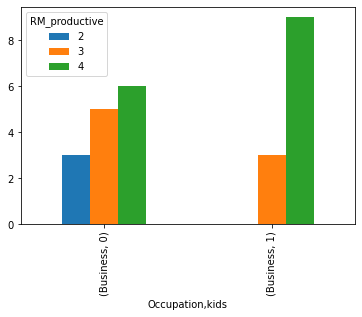

In [68]:
#only business people with kids are more productive 
df_busi.groupby(['Occupation','kids'])['RM_productive'].value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='Occupation,RM_job_opportunities'>

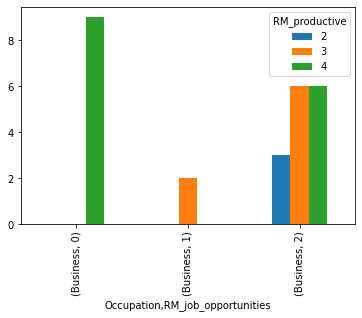

In [73]:
# 
df_busi.groupby(['Occupation','RM_job_opportunities'])['RM_productive'].value_counts().unstack().plot(kind='bar')

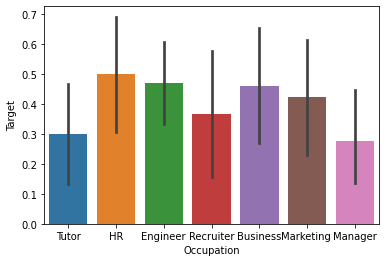

In [71]:
ax = sns.barplot(x="Occupation", y="Target", data=data)
plt.show()

In [74]:
from scipy.stats import chi2_contingency

In [76]:
cont_table = pd.crosstab(data['Occupation'], data['RM_productive'])
print(cont_table)

RM_productive  1   2   3   4   5
Occupation                      
Business       0   3   8  15   0
Engineer       3  12  12  18   6
HR             0   3   7   6  10
Manager        0   0  15   8   6
Marketing      0   0   9   9   8
Recruiter      0   3   6   7   3
Tutor          0   3   9   6  12


In [81]:
chi2, p_value, dof, expected = chi2_contingency(cont_table)

print(f"Chi-square test statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square test statistic: 109.29
P-value: 0.0000
Degrees of freedom: 16
Expected frequencies:
[[ 0.56521739  0.2173913   0.86956522  1.04347826  0.30434783]
 [ 4.52173913  1.73913043  6.95652174  8.34782609  2.43478261]
 [12.43478261  4.7826087  19.13043478 22.95652174  6.69565217]
 [13.          5.         20.         24.          7.        ]
 [ 8.47826087  3.26086957 13.04347826 15.65217391  4.56521739]]


In [78]:
cont_table = pd.crosstab(data['RM_productive'], data['RM_lazy'])
print(cont_table)

RM_lazy         1  2   3   4  5
RM_productive                  
1               0  0   0   0  3
2               3  3   3  12  3
3               9  3  24  24  6
4               0  9  21  33  6
5              27  0  12   3  3


In [80]:
chi2, p_value, dof, expected = chi2_contingency(cont_table)


print(f"Chi-square test statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square test statistic: 109.29
P-value: 0.0000
Degrees of freedom: 16
Expected frequencies:
[[ 0.56521739  0.2173913   0.86956522  1.04347826  0.30434783]
 [ 4.52173913  1.73913043  6.95652174  8.34782609  2.43478261]
 [12.43478261  4.7826087  19.13043478 22.95652174  6.69565217]
 [13.          5.         20.         24.          7.        ]
 [ 8.47826087  3.26086957 13.04347826 15.65217391  4.56521739]]


In [82]:
cont_table = pd.crosstab(data['RM_productive'], data['RM_improved_skillset'])
print(cont_table)

RM_improved_skillset  1  2   3   4   5
RM_productive                         
1                     0  3   0   0   0
2                     0  3  12   3   6
3                     6  9  27  12  12
4                     0  0  33  24  12
5                     0  3  15  15  12


In [83]:
chi2, p_value, dof, expected = chi2_contingency(cont_table)


print(f"Chi-square test statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square test statistic: 62.22
P-value: 0.0000
Degrees of freedom: 16
Expected frequencies:
[[ 0.08695652  0.26086957  1.26086957  0.7826087   0.60869565]
 [ 0.69565217  2.08695652 10.08695652  6.26086957  4.86956522]
 [ 1.91304348  5.73913043 27.73913043 17.2173913  13.39130435]
 [ 2.          6.         29.         18.         14.        ]
 [ 1.30434783  3.91304348 18.91304348 11.73913043  9.13043478]]
